*Seismogram's from Shihao's input file*

In [154]:
#reading files

from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

import obspy
from obspy import read
factor = 1666
#Rotational components of 1st station in x, y and z direction
st1_curlx = read('/home/ashah/Desktop/25AprOutput/surfac5.curlx')
st1_curly = read('/home/ashah/Desktop/25AprOutput/surfac5.curly')
st1_curlz = read('/home/ashah/Desktop/25AprOutput/surfac5.curlz')

#Translation components of displacement in x, y and z direction
st1_x = read('/home/ashah/Desktop/25AprOutput/surface5.x')
st1_y = read('/home/ashah/Desktop/25AprOutput/surface5.y')
st1_z = read('/home/ashah/Desktop/25AprOutput/surface5.z')

#Translation components of acceleration in x, y and z direction
st1_xv = read('/home/ashah/Desktop/25AprOutput/surface5.xv')
st1_yv = read('/home/ashah/Desktop/25AprOutput/surface5.yv')
st1_zv = read('/home/ashah/Desktop/25AprOutput/surface5.zv')



Epicentral distance [m]:  1118.028698661424
Theoretical azimuth [deg]:  26.565070660054552
Theoretical backazimuth [deg]:  206.56507101453164
3 Trace(s) in Stream:
.surface5..XR | 2019-04-25T09:28:47.000000Z - 2019-04-25T09:28:49.204474Z | 226.4 Hz, 500 samples
.surface5..YT | 2019-04-25T09:28:47.000000Z - 2019-04-25T09:28:49.204474Z | 226.4 Hz, 500 samples
.surface5..ZZ | 2019-04-25T09:28:47.000000Z - 2019-04-25T09:28:49.204474Z | 226.4 Hz, 500 samples


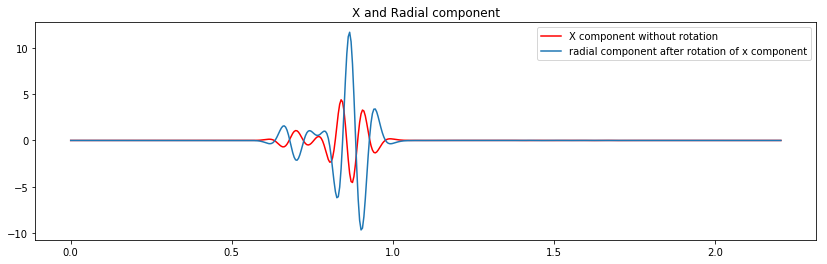

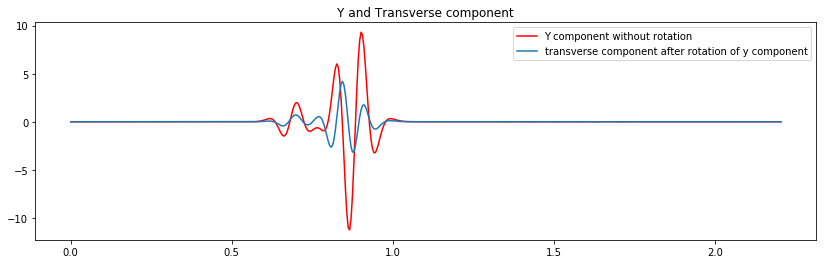

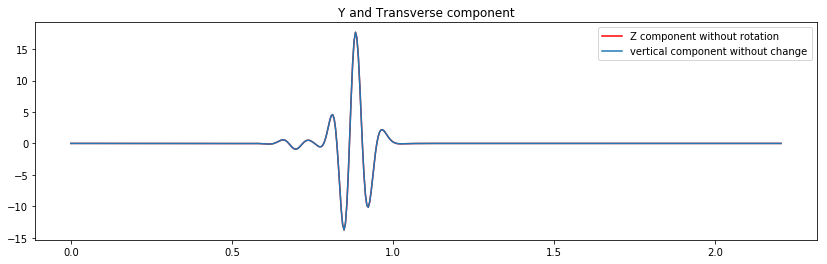

In [155]:
#transforming coordinates

from obspy.geodetics import gps2dist_azimuth
import obspy.signal.util as su

# Source position in geographic coordinate
lat_s = 0
long_s = 0

# Define the receiver position in Cartesian coordinate and convert it
#to geographic coordinate
dist_x = 0.5      # in km, the distance between receiver and source in x
#direction
dist_y = 1        # in km, the distance between receiver and source in y
#direction
long_r, lat_r = su.util_lon_lat(long_s,lat_s, dist_x, dist_y)

# Backazimuth
baz = gps2dist_azimuth(lat_s, long_s, lat_r, long_r)
print('Epicentral distance [m]: ', baz[0])
print('Theoretical azimuth [deg]: ', baz[1])
print('Theoretical backazimuth [deg]: ', baz[2])
st1_xv_copy = st1_xv.copy()
tr_xv = st1_xv_copy[0]
tr_xv.stats.channel = "XN"
st1_yv_copy = st1_yv.copy()
tr_yv = st1_yv_copy[0]
tr_yv.stats.channel = "YE"
st1_zv_copy = st1_zv.copy()
tr_zv = st1_zv_copy[0]
tr_zv.stats.channel = "ZZ"
st_1 = obspy.core.Stream([tr_xv, tr_yv, tr_zv])
st_1     = st_1.rotate(method='NE->RT',back_azimuth=80)
print(st_1)

fig = plt.figure(figsize=(14,4))
plt.plot(st1_xv[0].times(), st1_xv[0].data, color='r' , label='X component without rotation')
plt.plot(st_1[0].times(), st_1.select(channel= "XR")[0].data, label='radial component after rotation of x component')
plt.title('X and Radial component')
plt.legend()

fig = plt.figure(figsize=(14,4))
plt.plot(st1_yv[0].times(), st1_yv[0].data, color='r' , label='Y component without rotation')
plt.plot(st_1[0].times(), st_1.select(channel= "YT")[0].data, label='transverse component after rotation of y component')
plt.title('Y and Transverse component')
plt.legend()

fig = plt.figure(figsize=(14,4))
plt.plot(st1_zv[0].times(), st1_zv[0].data, color='r' , label='Z component without rotation')
plt.plot(st_1[0].times(), st_1.select(channel= "ZZ")[0].data, label='vertical component without change')
plt.title('Z and Vertical component')
plt.legend()



plt.title('Y and Transverse component')
plt.legend()


In [156]:

st1_curlx[0].data = st1_curlx[0].data * -2000
st1_curly[0].data = st1_curly[0].data * -7500

st1_curlz[0].data = st1_curlz[0].data * -6666

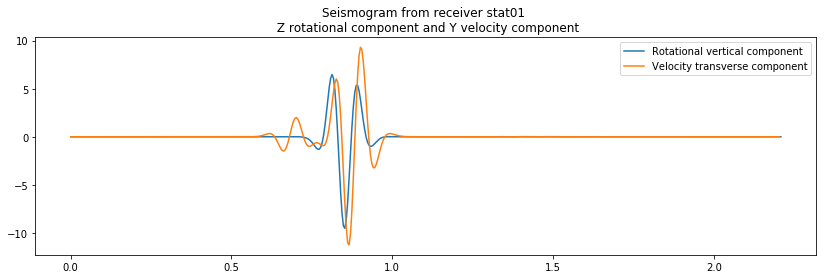

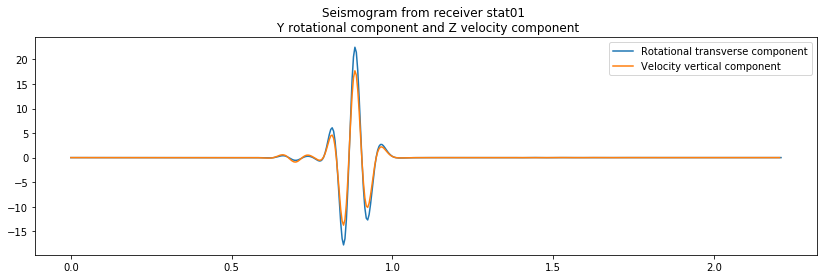

In [157]:

fig = plt.figure(figsize=(14,4))
dt = st1_curlz[0].stats.starttime
plt.plot(st1_curlz[0].times(), st1_curlz[0].data , label='Rotational vertical component')
plt.plot(st1_transverse[0].times(), st1_transverse[0].data, label='Velocity transverse component')
plt.title('Seismogram from receiver stat01 \n Z rotational component and Y velocity component')
plt.legend()



fig = plt.figure(figsize=(14,4))
plt.plot(st1_curlx[0].times(), st1_curlx[0].data, label='Rotational transverse component')
plt.plot(st1_vertical[0].times(), st1_vertical[0].data, label='Velocity vertical component')
plt.title('Seismogram from receiver stat01 \n Y rotational component and Z velocity component')
plt.legend()


